In [2]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'sunspot.csv'
df = pd.read_csv(file_path)
df.head()

,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
0,1818,1,1,1818.001,-1,-1.0,0,1
1,1818,1,2,1818.004,-1,-1.0,0,1
2,1818,1,3,1818.007,-1,-1.0,0,1
3,1818,1,4,1818.010,-1,-1.0,0,1
4,1818,1,5,1818.012,-1,-1.0,0,1


In [3]:
df.isnull().sum()

Year                        0
Month                       0
Day                         0
Date In Fraction Of Year    0
Number of Sunspots          0
Standard Deviation          0
Observations                0
Indicator                   0
dtype: int64

In [4]:
# Convert Year, Month, and Day to Date column
df['Date'] = pd.to_datetime(
    dict(year=df['Year'], month=df['Month'], day=df['Day'])
)

# Set the Date column as index
df = df.reset_index(drop=True)

# Display the first few rows of the dataframe
df.head()

,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator,Date
0,1818,1,1,1818.001,-1,-1.0,0,1,1818-01-01
1,1818,1,2,1818.004,-1,-1.0,0,1,1818-01-02
2,1818,1,3,1818.007,-1,-1.0,0,1,1818-01-03
3,1818,1,4,1818.010,-1,-1.0,0,1,1818-01-04
4,1818,1,5,1818.012,-1,-1.0,0,1,1818-01-05


In [5]:
df.tail()

,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator,Date
75660,2025,2,24,2025.149,164,16.0,20,0,2025-02-24
75661,2025,2,25,2025.152,166,22.5,18,0,2025-02-25
75662,2025,2,26,2025.155,124,18.6,21,0,2025-02-26
75663,2025,2,27,2025.158,130,20.8,26,0,2025-02-27
75664,2025,2,28,2025.160,117,20.0,29,0,2025-02-28


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75665 entries, 0 to 75664
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Year                      75665 non-null  int64         
 1   Month                     75665 non-null  int64         
 2   Day                       75665 non-null  int64         
 3   Date In Fraction Of Year  75665 non-null  float64       
 4   Number of Sunspots        75665 non-null  int64         
 5   Standard Deviation        75665 non-null  float64       
 6   Observations              75665 non-null  int64         
 7   Indicator                 75665 non-null  int64         
 8   Date                      75665 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 5.2 MB


# **Data Visualisation**
Plot the raw time series data to understand trends and seasonality, using libraries such as matplotlib or seaborn.

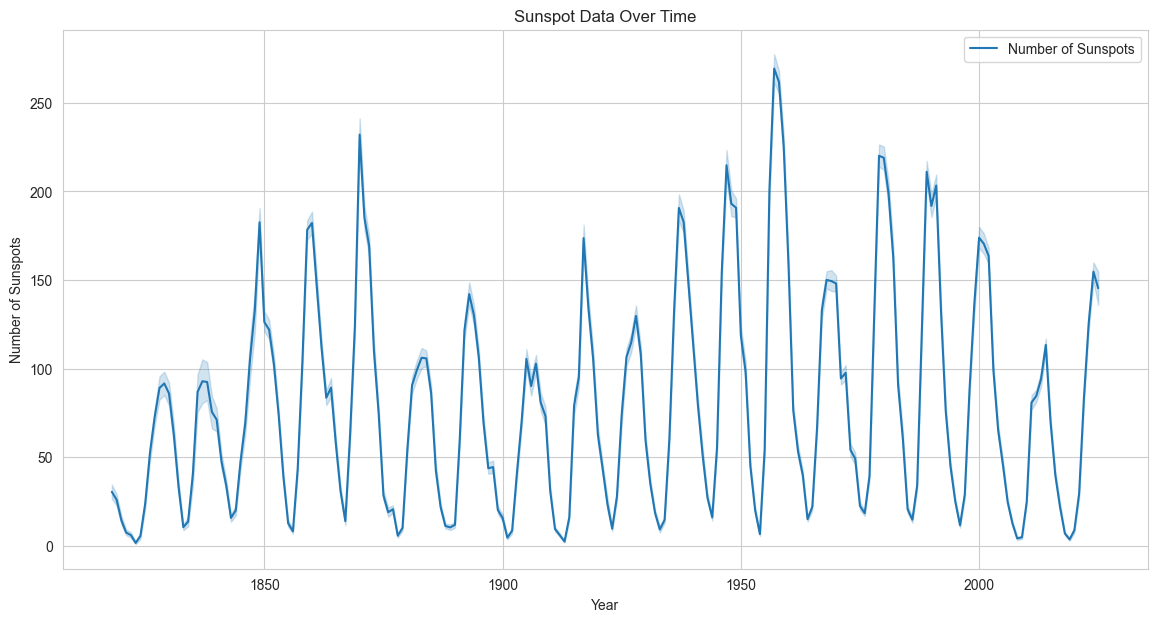

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the raw time series data using Seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Number of Sunspots', data=df, label='Number of Sunspots')
plt.title('Sunspot Data Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Sunspots')
plt.legend()
plt.show()

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, LSTM # type: ignore

# Select the 'Number of Sunspots' column
data = df[['Number of Sunspots']].values

# Scale the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Define a function to create sequences of data
def create_sequences(dataset, look_back=30):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i+look_back])
        y.append(dataset[i+look_back])
    return np.array(X), np.array(y)

look_back = 30
X_all, y_all = create_sequences(data_scaled, look_back=look_back)

# Split into train and test
train_size = int(len(X_all) * 0.8)
X_train, X_test = X_all[:train_size], X_all[train_size:]
y_train, y_test = y_all[:train_size], y_all[train_size:]


In [9]:
from tensorflow.keras.layers import Input # type: ignore

# Build the LSTM model
model = Sequential()
model.add(Input(shape=(look_back, 1)))
model.add(LSTM(50, activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, 
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0062 - val_loss: 0.0011
Epoch 2/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0041 - val_loss: 8.6212e-04
Epoch 3/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0037 - val_loss: 9.3271e-04
Epoch 4/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0036 - val_loss: 7.9545e-04
Epoch 5/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0035 - val_loss: 8.1135e-04
Epoch 6/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0036 - val_loss: 7.2251e-04
Epoch 7/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0035 - val_loss: 7.3657e-04
Epoch 8/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0036 - val_loss: 7.4554e-04
Epoch 9/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0035 - val_loss: 7.3669e-04
Epoch 10/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0036 - val_loss: 7.3526e-04


In [11]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [12]:
# Inverse-transform actual values for comparison
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

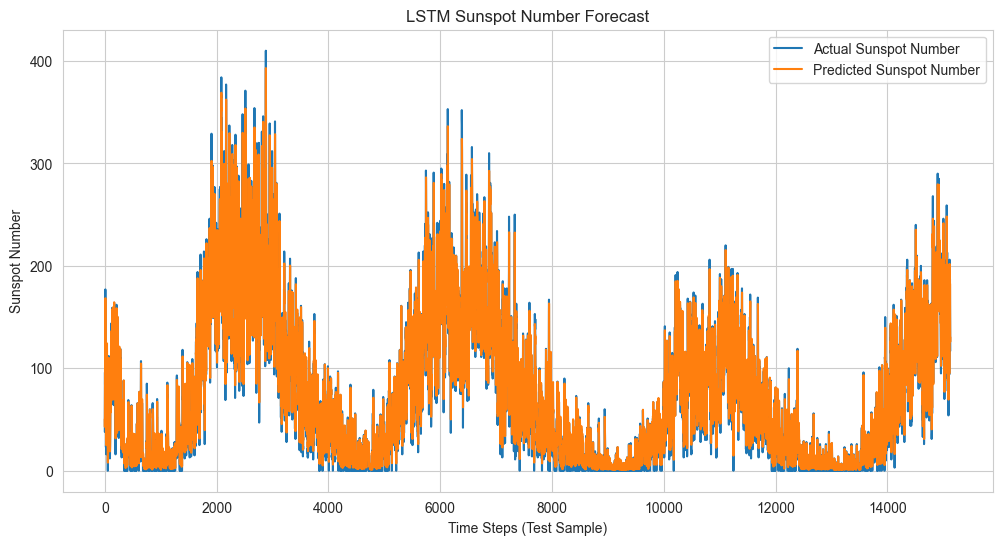

In [13]:
# Plot results
plt.figure(figsize=(12,6))
plt.plot(actual, label='Actual Sunspot Number')
plt.plot(predictions, label='Predicted Sunspot Number')
plt.title('LSTM Sunspot Number Forecast')
plt.xlabel('Time Steps (Test Sample)')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
mse = mean_squared_error(actual, predictions)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 205.75540185447238
Root Mean Squared Error (RMSE): 14.344176583355086


In [15]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # type: ignore

# Define the time series generator
look_back = 30
batch_size = 32

train_generator = TimeseriesGenerator(data_scaled, data_scaled, length=look_back, batch_size=batch_size)
test_generator = TimeseriesGenerator(data_scaled, data_scaled, length=look_back, batch_size=batch_size, start_index=train_size)

# Build the LSTM model
model = Sequential()
model.add(tf.keras.layers.Input(shape=(look_back, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=test_generator, verbose=1)

# Make predictions
predictions = model.predict(test_generator)
predictions = scaler.inverse_transform(predictions)

# Inverse-transform actual values for comparison
actual = scaler.inverse_transform(data_scaled[train_size + look_back:])

Epoch 1/10


c:\Users\XT\AppData\Local\Programs\Python\Python312\genv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2364/2364 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0079 - val_loss: 0.0013
Epoch 2/10
2364/2364 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0036 - val_loss: 0.0010
Epoch 3/10
2364/2364 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0034 - val_loss: 0.0011
Epoch 4/10
2364/2364 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0033 - val_loss: 7.6872e-04
Epoch 5/10
2364/2364 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0031 - val_loss: 7.6326e-04
Epoch 6/10
2364/2364 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0031 - val_loss: 7.5427e-04
Epoch 7/10
2364/2364 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0029 - val_loss: 7.3013e-04
Epoch 8/10
2364/2364 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0029 - val_loss: 7.3858e-04
Epoch 9/10
2364/2364 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0029 - val_loss: 7.4651e-04
Epoch 10/10
2364/2364 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0028 - val_loss: 7.5158e-04
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


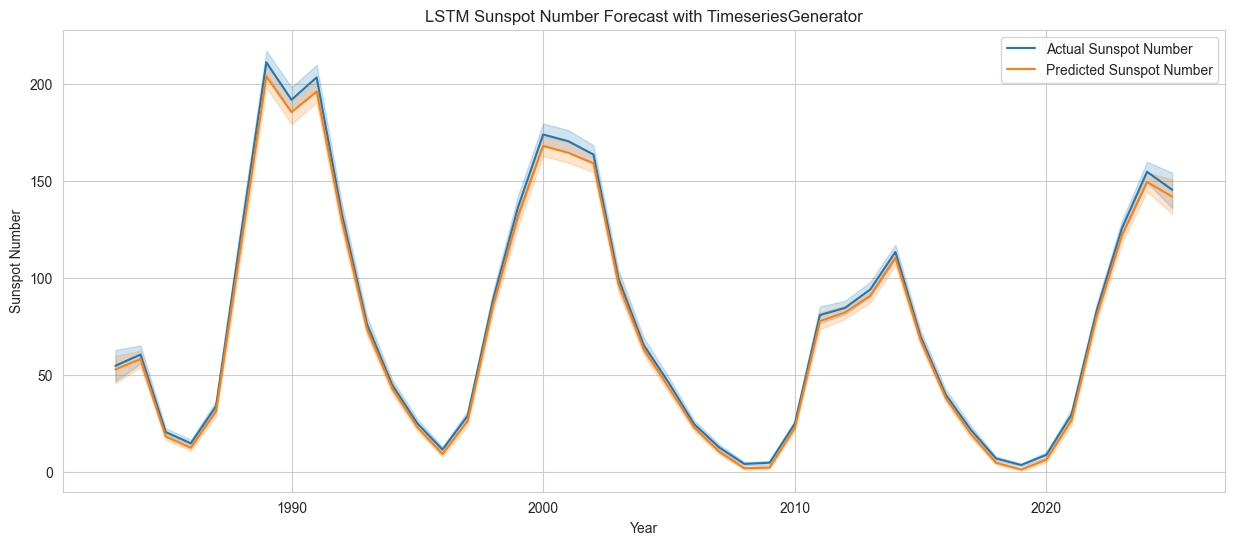

In [16]:
# Plot results using seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(x=df['Year'][-len(actual):], y=actual.flatten(), label='Actual Sunspot Number')
sns.lineplot(x=df['Year'][-len(predictions):], y=predictions.flatten(), label='Predicted Sunspot Number')
plt.title('LSTM Sunspot Number Forecast with TimeseriesGenerator')
plt.xlabel('Year')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()

In [17]:
# Define the time_step (look-back period), e.g., 30 days
time_step = 30

# Predict the next 11 years
future_steps = 4017

# Get the last time_step data points from the scaled data
last_data = data_scaled[-time_step:]

# Initialize the list to store future predictions
future_predictions = []

# Predict future values
for _ in range(future_steps):
    # Reshape the last_data to match the input shape of the model
    last_data_reshaped = last_data.reshape((1, time_step, 1))
    
    # Predict the next value
    next_value = model.predict(last_data_reshaped)
    
    # Append the predicted value to the future_predictions list
    future_predictions.append(next_value[0, 0])
    
    # Update the last_data by appending the predicted value and removing the first value
    last_data = np.append(last_data[1:], next_value, axis=0)

# Inverse transform the future predictions to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a date range for the future predictions starting one day after the last date
last_date = df['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps)

# Create a DataFrame for the future predictions
future_df = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted Sunspot Number'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━

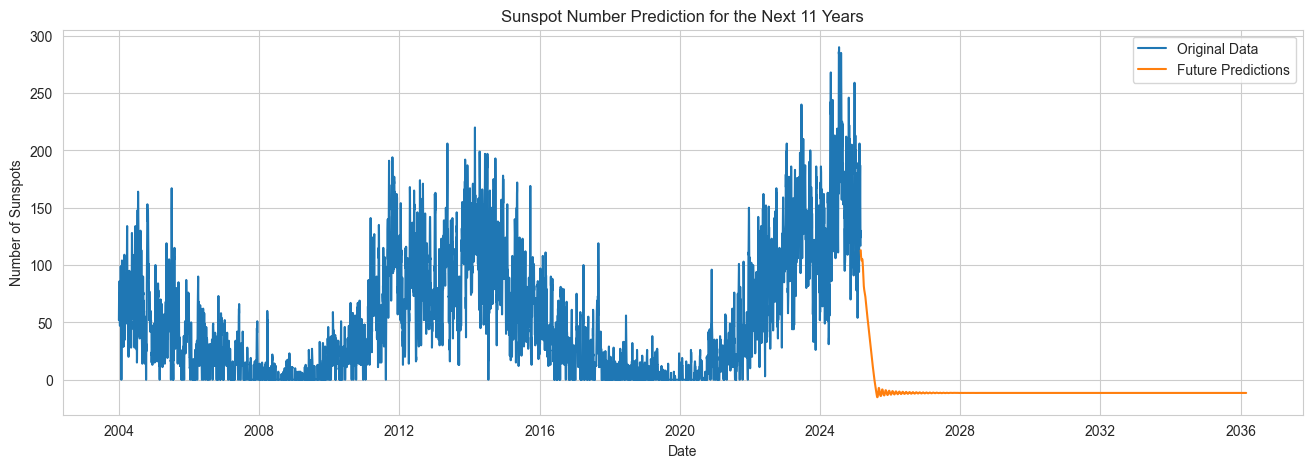

In [18]:
# Plot the future predictions using seaborn
# Filter the original data to include only dates from 1920 onwards
filtered_df = df[df['Date'] >= '2004-01-01']

# Plot the future predictions using seaborn
plt.figure(figsize=(16, 5))
sns.lineplot(x=filtered_df['Date'], y=filtered_df['Number of Sunspots'], label='Original Data')
sns.lineplot(x=future_df.index, y=future_df['Predicted Sunspot Number'], label='Future Predictions')
plt.title('Sunspot Number Prediction for the Next 11 Years')
plt.xlabel('Date')
plt.ylabel('Number of Sunspots')
plt.legend()
plt.show()

In [19]:
# Calculate the MSE of LSTM model
mse = mean_squared_error(actual, predictions)

# Calculate the RMSE of LSTM model
rmse = np.sqrt(mse)

# Calculate the Mean Absolute Error (MAE) of LSTM model
mae = np.mean(np.abs(actual - predictions))

# Calculate the R-squared score of LSTM model
r2_score = 1 - (np.sum((actual - predictions) ** 2) / np.sum((actual - np.mean(actual)) ** 2))

# Calculate the residuals
residuals = np.abs(actual - predictions)

# Calculate the Explained Variance Score of LSTM model
explained_variance = 1 - (np.var(actual - predictions) / np.var(actual))

print('---------------------------------------------------')
print('Evaluation Metrics for LSTM Model')
print(f'R-Squared Score: {r2_score}')
print(f'Residuals: {residuals}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Explained Variance Score: {explained_variance}')
print('---------------------------------------------------')

---------------------------------------------------
Evaluation Metrics for LSTM Model
R-Squared Score: 0.959290519832136
Residuals: [[ 7.63184738]
 [28.04214859]
 [15.44799042]
 ...
 [34.89100647]
 [10.31441498]
 [ 7.5269928 ]]
Mean Absolute Error (MAE): 10.203439560592315
Mean Squared Error (MSE): 210.32243148901952
Root Mean Squared Error (RMSE): 14.502497422479326
Explained Variance Score: 0.9612593086348017
---------------------------------------------------


In [20]:
# Calculate the MSE of future predictions
future_mse = mean_squared_error(filtered_df['Number of Sunspots'].values[-future_steps:], future_predictions)

# Calculate the RMSE of future predictions
future_rmse = np.sqrt(future_mse)

# Calculate the Mean Absolute Error (MAE) of future predictions
future_mae = np.mean(np.abs(filtered_df['Number of Sunspots'].values[-future_steps:] - future_predictions))

# Calculate the R-squared score of future predictions
future_r2_score = 1 - (np.sum((filtered_df['Number of Sunspots'].values[-future_steps:] - future_predictions) ** 2) / np.sum((filtered_df['Number of Sunspots'].values[-future_steps:] - np.mean(filtered_df['Number of Sunspots'].values[-future_steps:])) ** 2))

# Calculate the residuals of future predictions
future_residuals = np.abs(filtered_df['Number of Sunspots'].values[-future_steps:] - future_predictions)

print('---------------------------------------------------')
print('Evaluation Metrics for Future Predictions')
print(f'Mean Squared Error (MSE) for Future Predictions: {future_mse}')
print(f'Root Mean Squared Error (RMSE) for Future Predictions: {future_rmse}')
print(f'Mean Absolute Error (MAE) for Future Predictions: {future_mae}')
print(f'R-Squared Score for Future Predictions: {future_r2_score}')
print(f'Residuals for Future Predictions: {future_residuals}')
print('---------------------------------------------------')

---------------------------------------------------
Evaluation Metrics for Future Predictions
Mean Squared Error (MSE) for Future Predictions: 8209.235585611168
Root Mean Squared Error (RMSE) for Future Predictions: 90.60483202131753
Mean Absolute Error (MAE) for Future Predictions: 70.79530676385961
R-Squared Score for Future Predictions: -9662.942560730082
Residuals for Future Predictions: [[ 45.07278442  48.07278442  28.07278442 ...  11.07278442  17.07278442
    4.07278442]
 [ 47.65429688  50.65429688  30.65429688 ...  13.65429688  19.65429688
    6.65429688]
 [ 49.3089447   52.3089447   32.3089447  ...  15.3089447   21.3089447
    8.3089447 ]
 ...
 [169.51312923 172.51312923 152.51312923 ... 135.51312923 141.51312923
  128.51312923]
 [169.51312447 172.51312447 152.51312447 ... 135.51312447 141.51312447
  128.51312447]
 [169.51312065 172.51312065 152.51312065 ... 135.51312065 141.51312065
  128.51312065]]
---------------------------------------------------


01:40:35 - cmdstanpy - INFO - Chain [1] start processing
01:41:13 - cmdstanpy - INFO - Chain [1] done processing


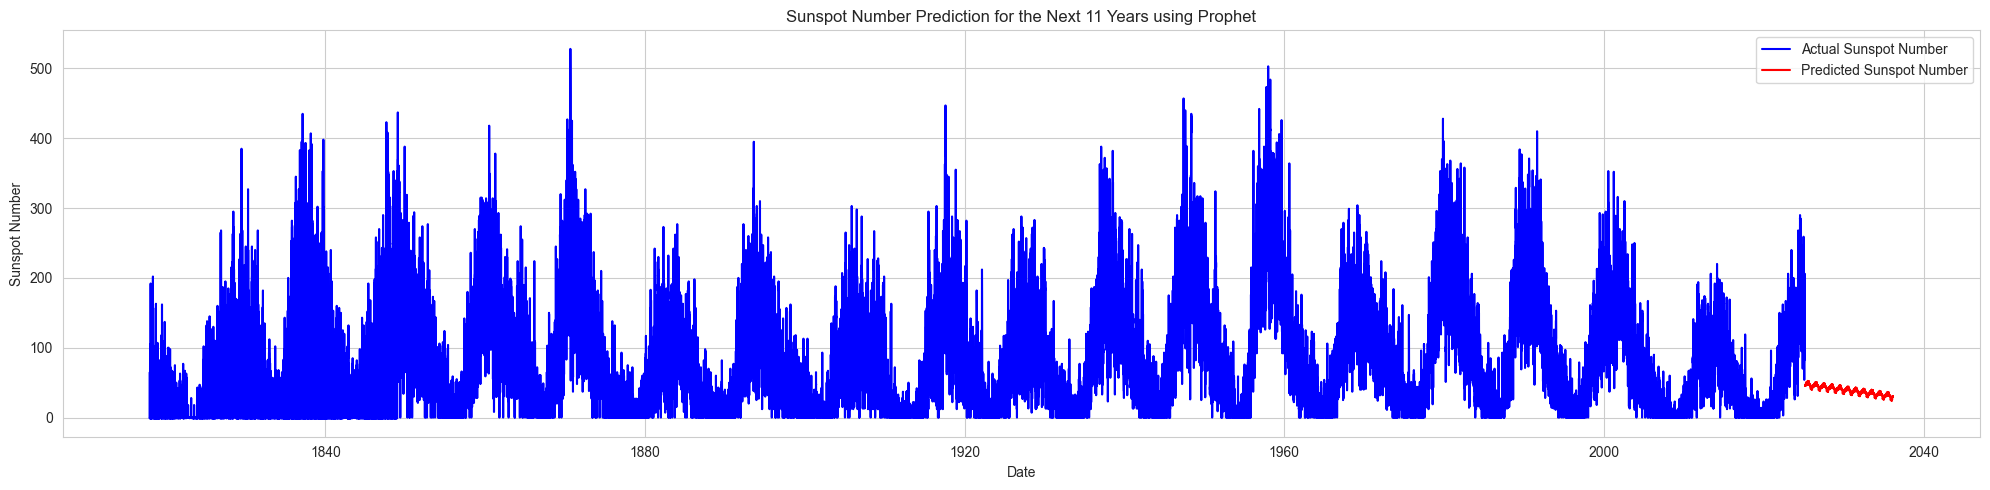

In [21]:
from prophet import Prophet

# Prepare the data for Prophet
df_prophet = df[['Date', 'Number of Sunspots']].rename(columns={'Date': 'ds', 'Number of Sunspots': 'y'})

# Initialize the Prophet model
model_prophet = Prophet()

# Fit the model
model_prophet.fit(df_prophet)

# Make future dataframe for 11 years
future = model_prophet.make_future_dataframe(periods=4017)

# Predict the future
forecast = model_prophet.predict(future)

# Plot the actual and predicted values
plt.figure(figsize=(20, 5))

# Plot actual values from the original dataframe up to the last date in the original data
plt.plot(df_prophet['ds'], df_prophet['y'], label='Actual Sunspot Number', color='blue')

# Plot predicted values starting from the day after the last date in the original data
plt.plot(forecast['ds'][df_prophet.shape[0]:], forecast['yhat'][df_prophet.shape[0]:], 
         label='Predicted Sunspot Number', color='red')

# Set plot title and labels
plt.title('Sunspot Number Prediction for the Next 11 Years using Prophet')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')

# Add legend
plt.legend()
plt.tight_layout()
# Show plot
plt.show()

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

def mean_absolute_scaled_error(y_true, y_pred, y_train, mae_train):
    n = len(y_true)
    d = np.abs(np.diff(y_train)).sum() / (len(y_train) - 1)
    errors = np.abs(y_true - y_pred)
    return errors.mean() / d

# Calculate the Mean Squared Error (MSE) for Prophet
mse_prophet = mean_squared_error(df_prophet['y'], forecast['yhat'][:df_prophet.shape[0]])
print('Mean Squared Error (MSE) for Prophet:', mse_prophet)

# Calculate the Mean Absolute Error (MAE) for Prophet
mae_prophet = mean_absolute_error(df_prophet['y'], forecast['yhat'][:df_prophet.shape[0]])
print('Mean Absolute Error (MAE) for Prophet:', mae_prophet)

# Calculate the Root Mean Squared Error (RMSE) for Prophet
rmse_prophet = np.sqrt(mse_prophet)
print('Root Mean Squared Error (RMSE) for Prophet:', rmse_prophet)

# Calculate the Mean Absolute Scaled Error (MASE) for Prophet
mase_prophet = mean_absolute_scaled_error(df_prophet['y'], forecast['yhat'][:df_prophet.shape[0]], 
                                          df_prophet['y'].shift(1).dropna(), mae_prophet)
print('Mean Absolute Scaled Error (MASE) for Prophet:', mase_prophet)

# Calculate the R-squared value for Prophet
r2_prophet = r2_score(df_prophet['y'], forecast['yhat'][:df_prophet.shape[0]])
print('R-squared value for Prophet:', r2_prophet)

# Calculate the Explained Variance Score for Prophet
evs_prophet = explained_variance_score(df_prophet['y'], forecast['yhat'][:df_prophet.shape[0]])
print('Explained Variance Score for Prophet:', evs_prophet)

Mean Squared Error (MSE) for Prophet: 5081.905283032244
Mean Absolute Error (MAE) for Prophet: 57.09709439419551
Root Mean Squared Error (RMSE) for Prophet: 71.2874833545991
Mean Absolute Scaled Error (MASE) for Prophet: 3.2675809953461257
R-squared value for Prophet: 0.1476005202079712
Explained Variance Score for Prophet: 0.1476005202952123


In [23]:
from statsmodels.tsa.arima.model import ARIMA

import matplotlib.pyplot as plt

# Prepare the data for ARIMA
# Use the 'Number of Sunspots' column as the time series data
time_series_data = df['Number of Sunspots']

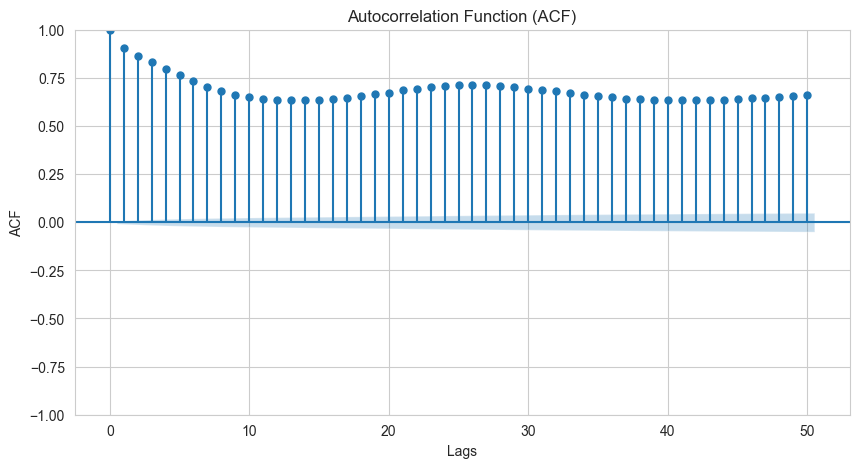

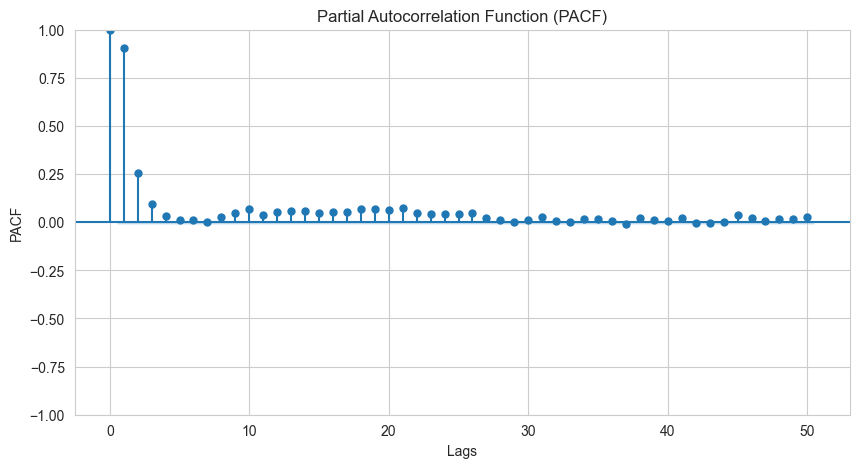

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(10, 5))
plot_acf(time_series_data, lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

# Plot PACF
plt.figure(figsize=(10, 5))
plot_pacf(time_series_data, lags=50, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()

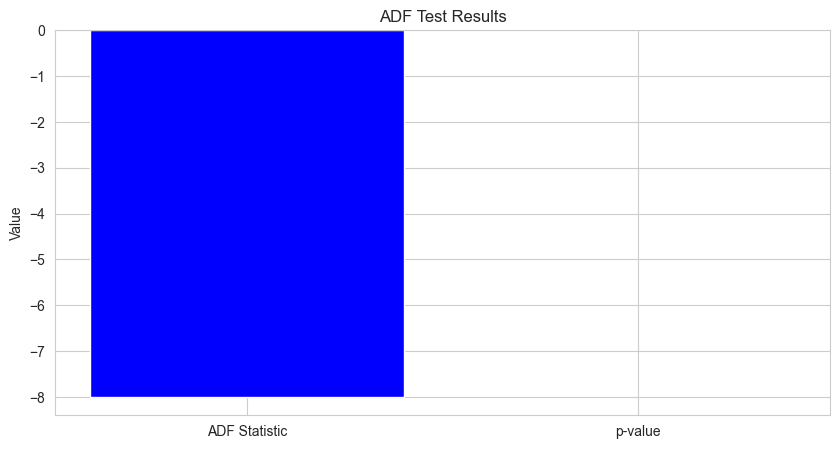

ADF Statistic: -7.999759024543343
p-value: 2.3511572436168886e-12


In [25]:
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt

# Perform the ADF test
adf_result = adfuller(time_series_data)

# Extract the test statistic and p-value
adf_statistic = adf_result[0]
p_value = adf_result[1]

# Plot the ADF test results
plt.figure(figsize=(10, 5))
plt.bar(['ADF Statistic', 'p-value'], [adf_statistic, p_value], color=['blue', 'orange'])
plt.title('ADF Test Results')
plt.ylabel('Value')
plt.show()

# Print the test results
print(f"ADF Statistic: {adf_statistic}")
print(f"p-value: {p_value}")

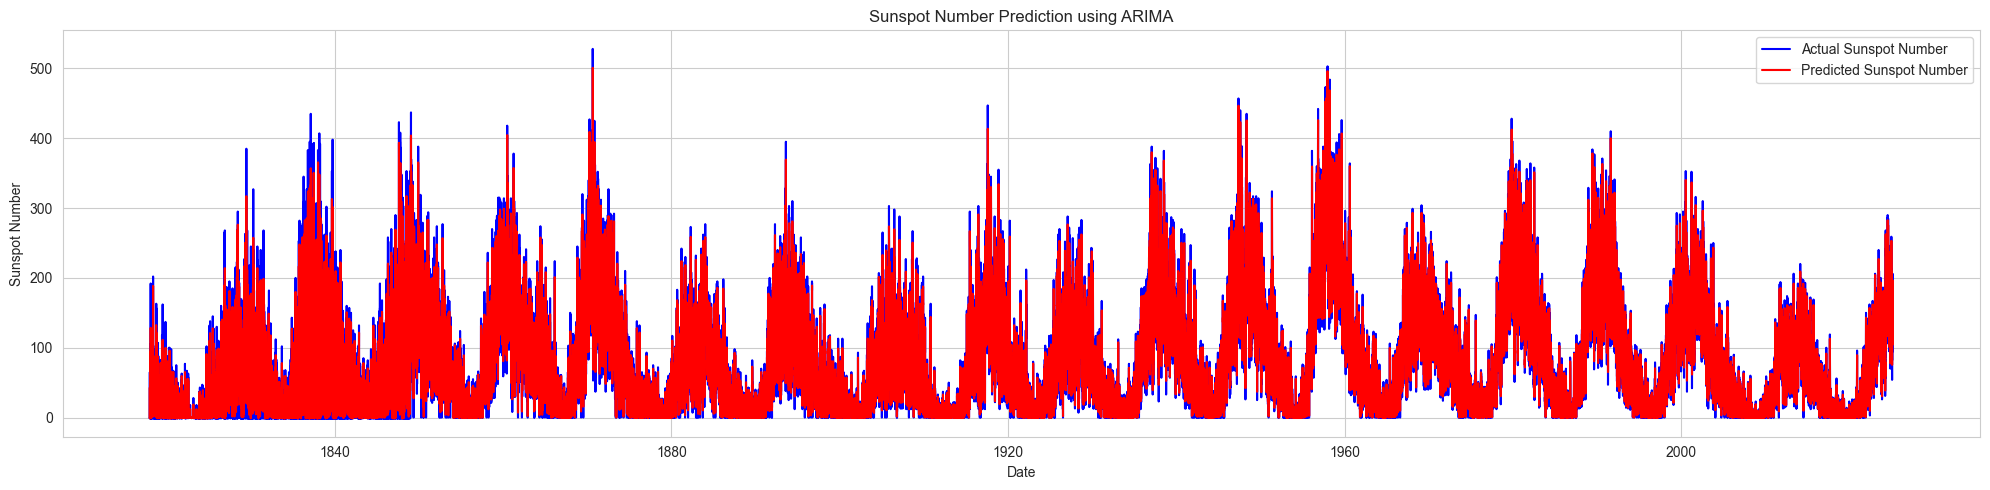

In [26]:
# Define the ARIMA model
model_arima = ARIMA(time_series_data, order=(5, 1, 0))

# Fit the ARIMA model
model_arima_fit = model_arima.fit()

# Make predictions
predictions_arima = model_arima_fit.predict(start=1, end=len(time_series_data))

# Plot the actual and predicted values
plt.figure(figsize=(20, 5))

# Plot actual values
plt.plot(df['Date'], time_series_data, label='Actual Sunspot Number', color='blue')

# Plot predicted values
plt.plot(df['Date'], predictions_arima, label='Predicted Sunspot Number', color='red')

# Set plot title and labels
plt.title('Sunspot Number Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')

# Add legend
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
# Print the ARIMA model summary
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     Number of Sunspots   No. Observations:                75665
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -369335.954
Date:                Sat, 05 Apr 2025   AIC                         738683.908
Time:                        01:41:38   BIC                         738739.312
Sample:                             0   HQIC                        738700.935
                              - 75665                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3336      0.002   -211.515      0.000      -0.337      -0.330
ar.L2         -0.1427      0.002    -82.068      0.000      -0.146      -0.139
ar.L3         -0.0706      0.002    -40.355      0.000      -0.074      -0.067
ar.L4         -0.0433      0.002    -26.163      0.000      -0.047      -0.040
ar.L5         -0.0334      0.001    -23.672      0.000      -0.036      -0.031
sigma2      1017.1044      2.044    497.687      0.000    1013.099    1021.110
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):           1137497.70
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

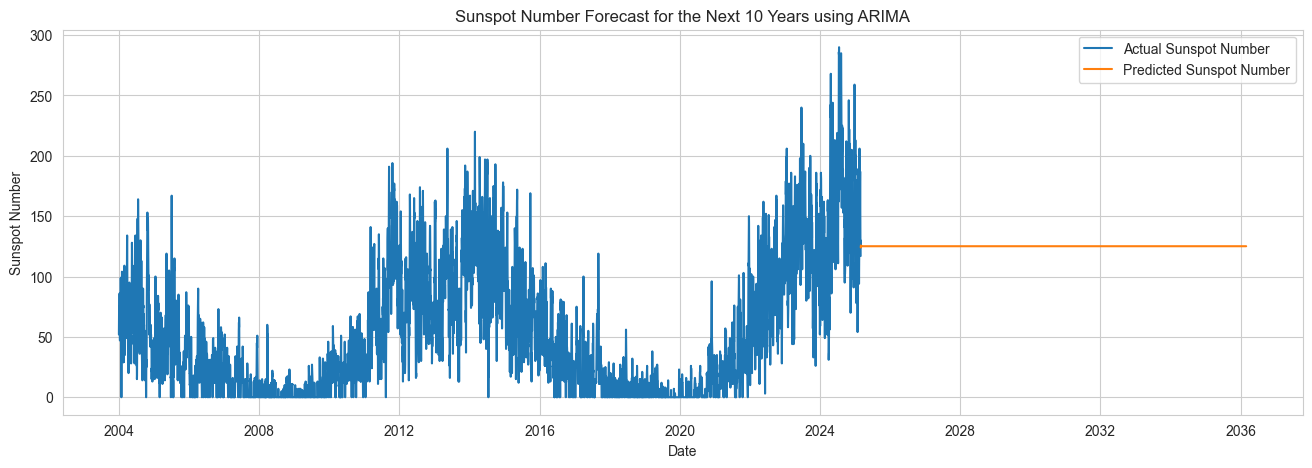

In [29]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming time_series_data and model_arima_fit are already defined from previous cells

# Forecast for the next 11 years (4017 days)
forecast_period_arima = 4017
forecast_arima_11_years = model_arima_fit.forecast(steps=forecast_period_arima)

# Create a date range for the future predictions
last_date = df['Date'].iloc[-1]
future_dates_arima_11_years = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_period_arima)

# Filter the original data to include only dates from 2004 onwards
filtered_df_arima = df[df['Date'] >= '2004-01-01']

# Create the DataFrame for future predictions
future_df_arima_11_years = pd.DataFrame(
	{'Predicted Sunspot Number': forecast_arima_11_years.values},
	index=future_dates_arima_11_years
)

# Plot the future forecast using seaborn
plt.figure(figsize=(16, 5))
sns.lineplot(x=filtered_df_arima['Date'], y=filtered_df_arima['Number of Sunspots'], label='Actual Sunspot Number')
sns.lineplot(x=future_df_arima_11_years.index, y=future_df_arima_11_years['Predicted Sunspot Number'], label='Predicted Sunspot Number')
plt.title('Sunspot Number Forecast for the Next 11 Years using ARIMA')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()

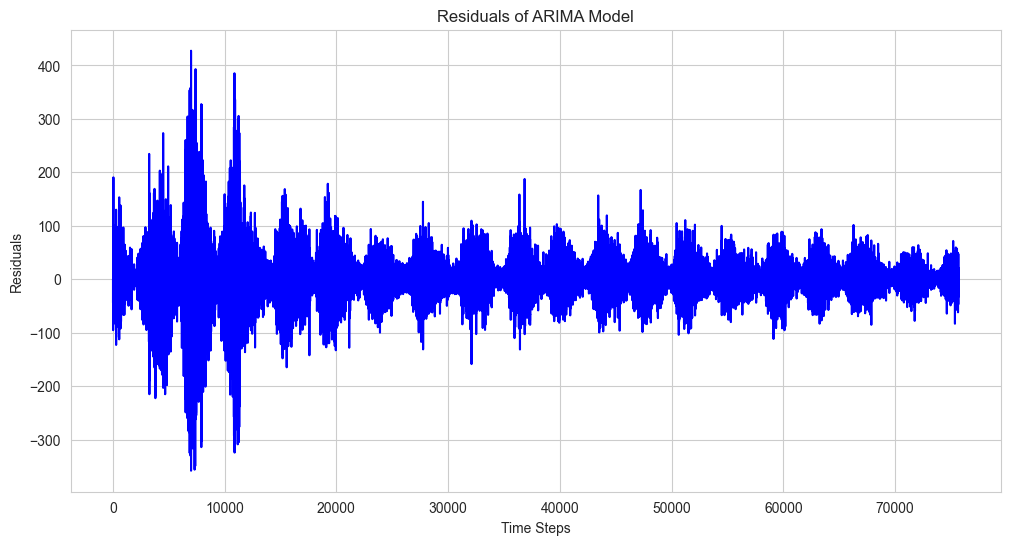

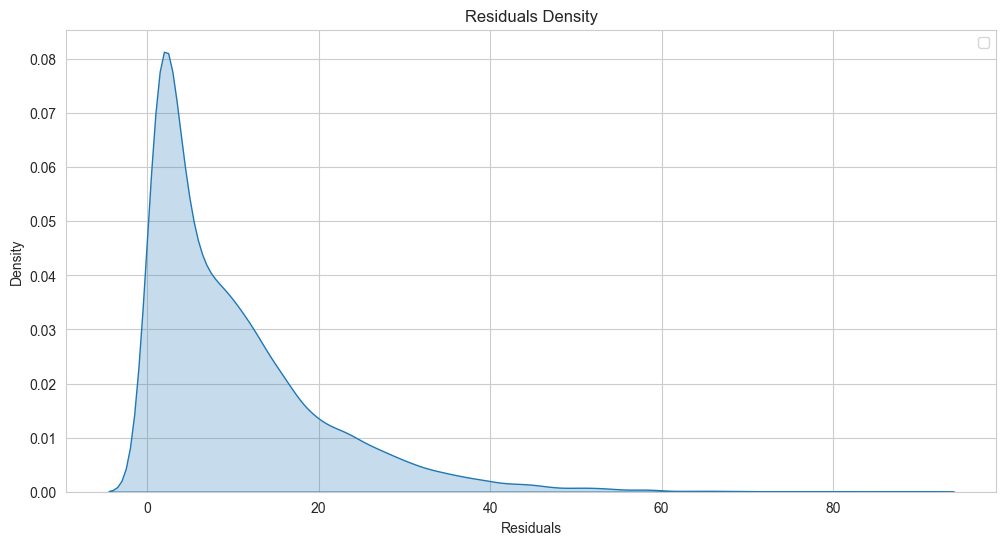

In [30]:
import warnings
warnings.filterwarnings('ignore')
# Calculate adjusted predictions by adding residuals to the actual values
adjusted_predictions = actual + residuals

# Plotting the residuals of ARIMA model
plt.figure(figsize=(12, 6))
plt.plot(model_arima_fit.resid, color='blue')
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time Steps')
plt.ylabel('Residuals')
plt.show()

# Plotting the residuals density
plt.figure(figsize=(12, 6))
sns.kdeplot(residuals, color='red', shade=True)
plt.title('Residuals Density')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
# Display the plot
plt.show()

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ensure predictions_arima has the same length as time_series_data[1:]
predictions_arima = predictions_arima[:len(time_series_data[1:])]

# Calculate Mean Absolute Error (MAE)
mae_arima = mean_absolute_error(time_series_data[1:], predictions_arima)
print(f"Mean Absolute Error (MAE) for ARIMA: {mae_arima}")

# Calculate Mean Squared Error (MSE)
mse_arima = mean_squared_error(time_series_data[1:], predictions_arima)
print(f"Mean Squared Error (MSE) for ARIMA: {mse_arima}")

# Calculate Root Mean Squared Error (RMSE)
rmse_arima = np.sqrt(mse_arima)
print(f"Root Mean Squared Error (RMSE) for ARIMA: {rmse_arima}")

# Calculate R-Squared
r2_arima = r2_score(time_series_data[1:], predictions_arima)
print(f"R-Squared for ARIMA: {r2_arima}")

# Calculate Mean Absolute Scaled Error (MASE)
def mean_absolute_scaled_error(y_true, y_pred, y_train):
    n = len(y_true)
    d = np.abs(np.diff(y_train)).sum() / (len(y_train) - 1)
    errors = np.abs(y_true - y_pred)
    return errors.mean() / d

mase_arima = mean_absolute_scaled_error(time_series_data[1:], predictions_arima, time_series_data[:train_size])
print(f"Mean Absolute Scaled Error (MASE) for ARIMA: {mase_arima}")

Mean Absolute Error (MAE) for ARIMA: 18.497820112894498
Mean Squared Error (MSE) for ARIMA: 1017.0372318110539
Root Mean Squared Error (RMSE) for ARIMA: 31.89102117855516
R-Squared for ARIMA: 0.8294098605954663
Mean Absolute Scaled Error (MASE) for ARIMA: 0.9583657797572741


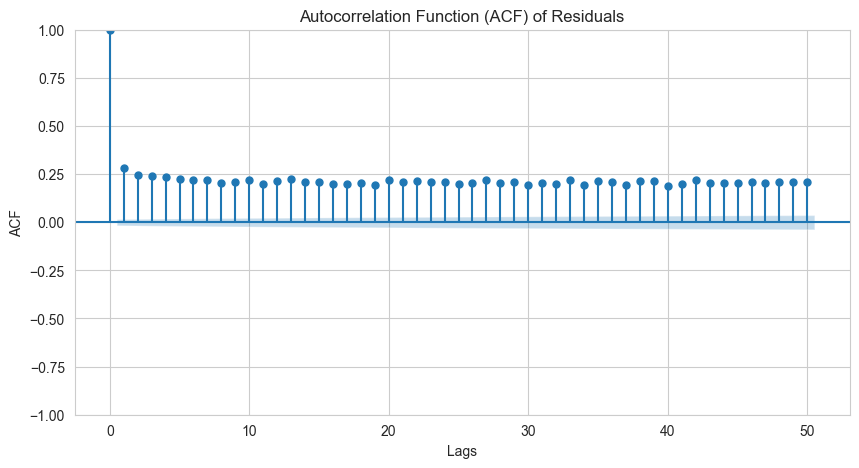

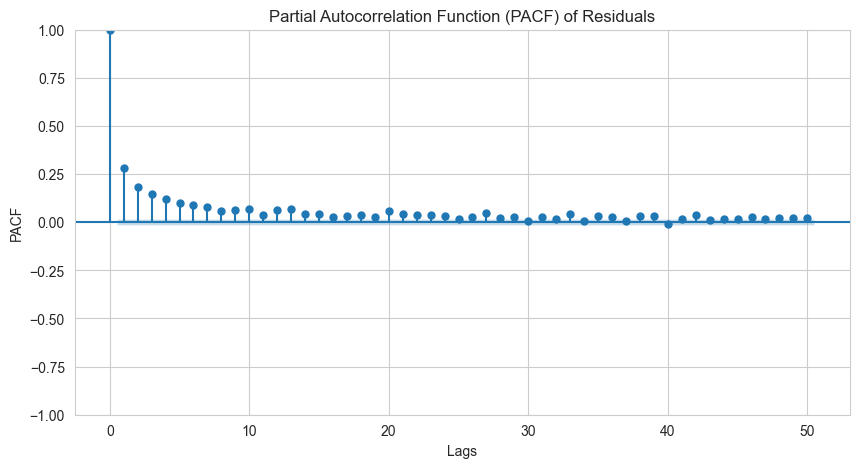

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF of residuals
plt.figure(figsize=(10, 5))
plot_acf(residuals, lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

# Plot PACF of residuals
plt.figure(figsize=(10, 5))
plot_pacf(residuals, lags=50, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation Function (PACF) of Residuals')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()

In [35]:
# Using SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model
model_sarima = SARIMAX(time_series_data, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))

# Fit the SARIMA model
model_sarima_fit = model_sarima.fit()

# Model Summary
model_sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                   Number of Sunspots   No. Observations:                75665
Model:             SARIMAX(5, 1, 0)x(1, 1, [1], 12)   Log Likelihood             -369220.066
Date:                              Sat, 05 Apr 2025   AIC                         738456.133
Time:                                      01:54:32   BIC                         738530.004
Sample:                                           0   HQIC                        738478.836
                                            - 75665                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3389      0.002   -215.476      0.000      -0.342      -0.336
ar.L2         -0.1480      0.002    -85.348      0.000      -0.151      -0.145
ar.L3         -0.0781      0.002    -44.482      0.000      -0.082      -0.075
ar.L4         -0.0507      0.002    -30.554      0.000      -0.054      -0.047
ar.L5         -0.0401      0.001    -28.491      0.000      -0.043      -0.037
ar.S.L12      -0.0544      0.001    -36.439      0.000      -0.057      -0.051
ma.S.L12      -0.9997      0.000  -3166.025      0.000      -1.000      -0.999
sigma2      1014.2120      2.056    493.372      0.000    1010.183    1018.241
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):           1128239.57
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

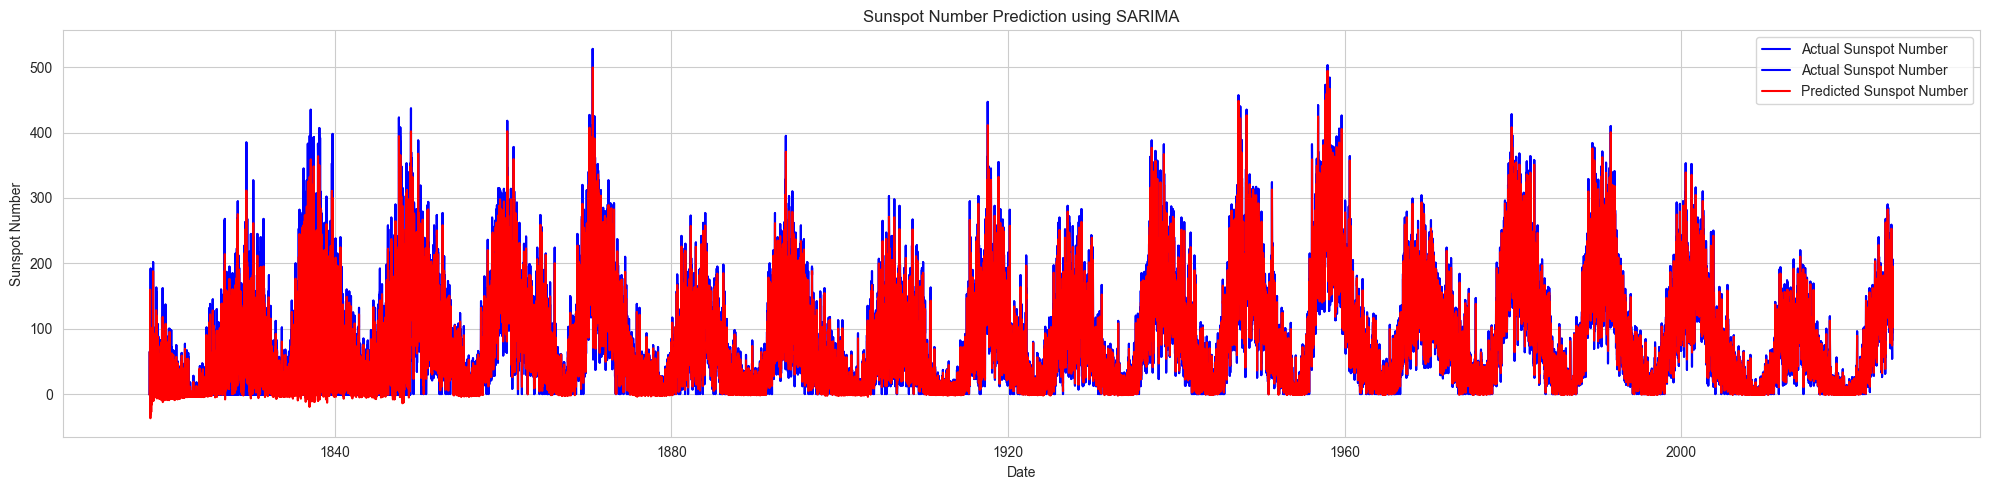

In [36]:
# Make predictions
predictions_sarima = model_sarima_fit.predict(start=1, end=len(time_series_data))

# Plot the actual and predicted values
plt.figure(figsize=(20, 5))

# Plot actual values based on 2004 and onwards
plt.plot(df['Date'], time_series_data, label='Actual Sunspot Number', color='blue')
plt.plot(df['Date'], time_series_data, label='Actual Sunspot Number', color='blue')

# Plot predicted values
plt.plot(df['Date'], predictions_sarima, label='Predicted Sunspot Number', color='red')

# Set plot title and labels
plt.title('Sunspot Number Prediction using SARIMA')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')

# Add legend
plt.legend()
plt.tight_layout()
plt.show()

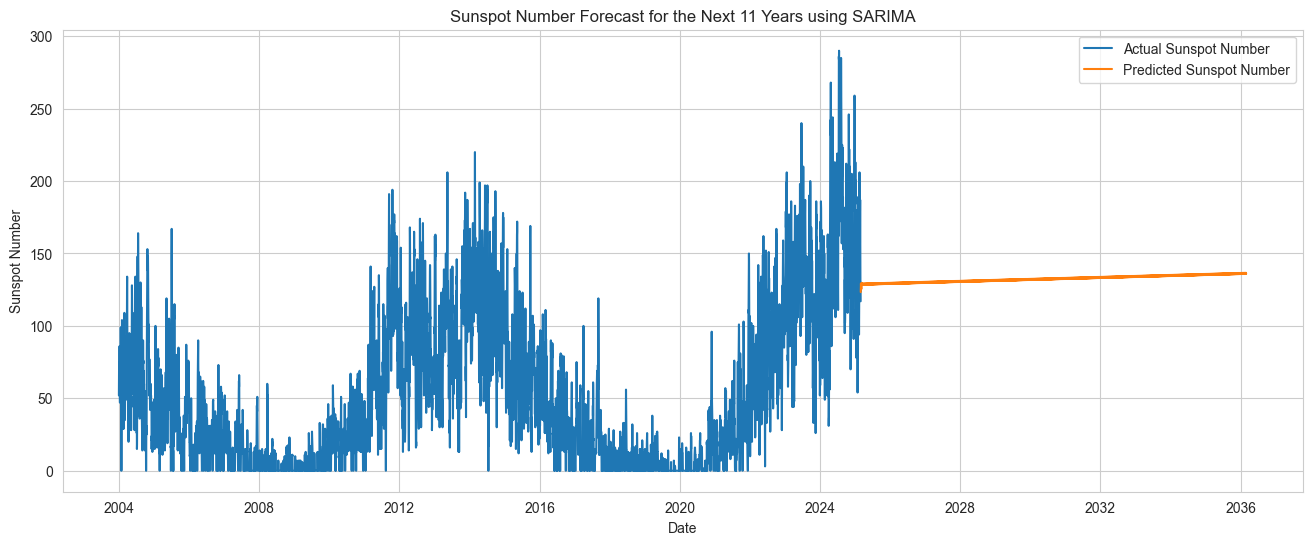

In [58]:
# Forecasting future values using SARIMA with get_forecast
forecast_period = 4017  # 11 years (assuming daily data)

# Use get_forecast to obtain predicted_mean and confidence intervals
forecast_obj = model_sarima_fit.get_forecast(steps=forecast_period)
forecast_sarima = forecast_obj.predicted_mean

# Create a date range for the future predictions starting one day after the last date
last_date = df['Date'].iloc[-1]
future_dates_sarima = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_period)

# Create a DataFrame for the future predictions
future_df_sarima = pd.DataFrame({'Predicted Sunspot Number': forecast_sarima.values}, index=future_dates_sarima)

# Plot the actual data and the SARIMA forecast
plt.figure(figsize=(16, 6))
sns.lineplot(data=filtered_df, x='Date', y='Number of Sunspots', label='Actual Sunspot Number')
sns.lineplot(x=future_df_sarima.index, y=future_df_sarima['Predicted Sunspot Number'], label='Predicted Sunspot Number')
plt.title('Sunspot Number Forecast for the Next 11 Years using SARIMA')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()

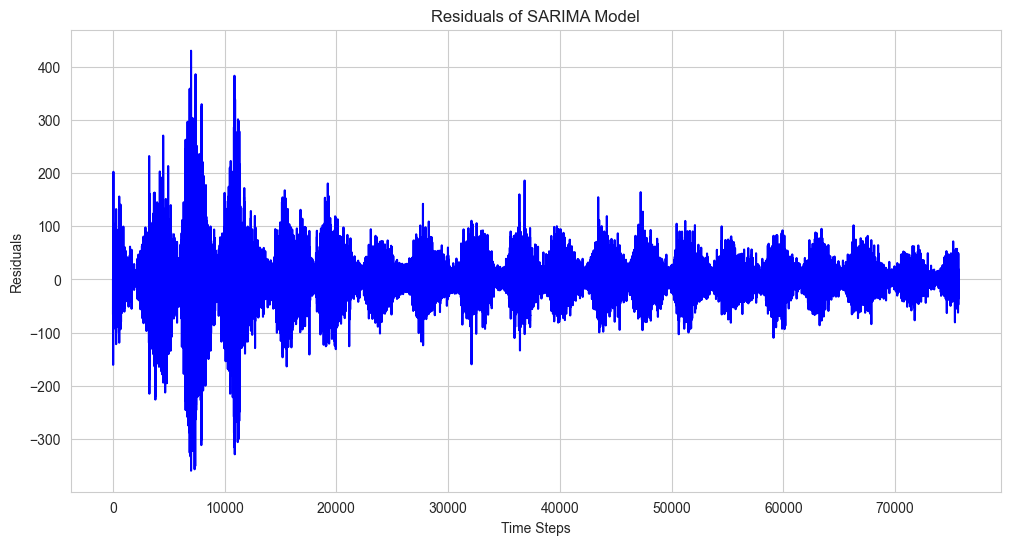

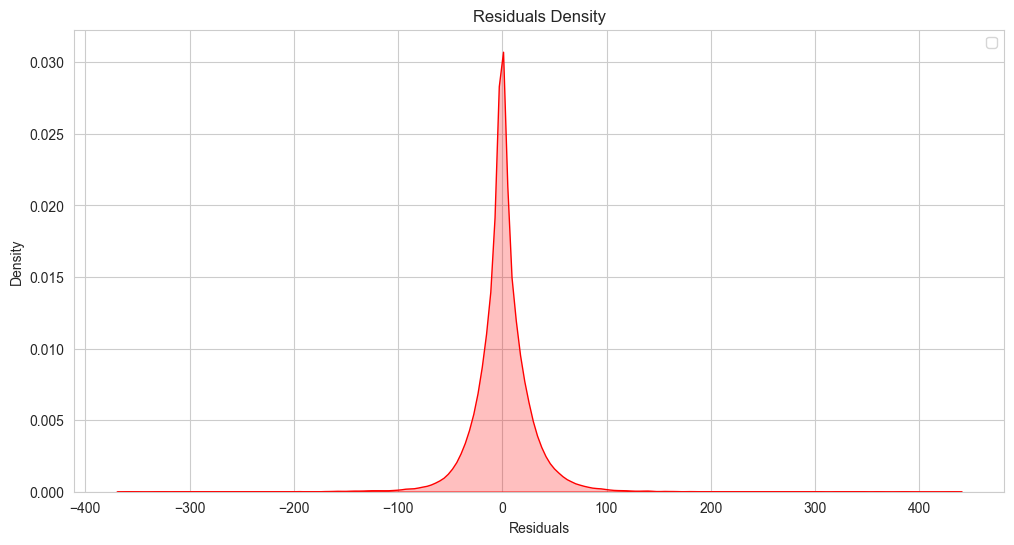

In [38]:
# Calculate the residuals of SARIMA model
residuals_sarima = time_series_data - predictions_sarima

# Plotting the residuals of SARIMA model
plt.figure(figsize=(12, 6))
plt.plot(model_sarima_fit.resid, color='blue')
plt.title('Residuals of SARIMA Model')
plt.xlabel('Time Steps')
plt.ylabel('Residuals')
plt.show()

# Plotting the residuals density
plt.figure(figsize=(12, 6))
sns.kdeplot(residuals_sarima, color='red', shade=True)
plt.title('Residuals Density')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.show()

In [39]:
# Calculate Mean Absolute Error (MAE) for SARIMA
mae_sarima = mean_absolute_error(time_series_data, predictions_sarima)
print(f"Mean Absolute Error (MAE) for SARIMA: {mae_sarima}")
# Calculate Mean Squared Error (MSE) for SARIMA
mse_sarima = mean_squared_error(time_series_data, predictions_sarima)
print(f"Mean Squared Error (MSE) for SARIMA: {mse_sarima}")
# Calculate Root Mean Squared Error (RMSE) for SARIMA
rmse_sarima = np.sqrt(mse_sarima)
print(f"Root Mean Squared Error (RMSE) for SARIMA: {rmse_sarima}")
# Calculate R-Squared for SARIMA
r2_sarima = r2_score(time_series_data, predictions_sarima)
print(f"R-Squared for SARIMA: {r2_sarima}")
# Calculate Mean Absolute Scaled Error (MASE) for SARIMA
mase_sarima = mean_absolute_scaled_error(time_series_data, predictions_sarima, time_series_data[:train_size])
print(f"Mean Absolute Scaled Error (MASE) for SARIMA: {mase_sarima}")
# Calculate Explained Variance Score for SARIMA
evs_sarima = explained_variance_score(time_series_data, predictions_sarima)
print(f"Explained Variance Score for SARIMA: {evs_sarima}")

Mean Absolute Error (MAE) for SARIMA: 6.735659227598636
Mean Squared Error (MSE) for SARIMA: 121.65317066330479
Root Mean Squared Error (RMSE) for SARIMA: 11.029649616524761
R-Squared for SARIMA: 0.9795948382322902
Mean Absolute Scaled Error (MASE) for SARIMA: 0.964503987225999
Explained Variance Score for SARIMA: 0.9795948466776292


In [40]:
# Now perform Arch and Garch models
from arch import arch_model

# Define the GARCH model
model_garch = arch_model(time_series_data, vol='Garch', p=1, q=1)

# Fit the GARCH model
model_garch_fit = model_garch.fit()

# Model Summary
model_garch_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 25595922.990727257
Iteration:      2,   Func. Count:     12,   Neg. LLF: 537267.475266647
Iteration:      3,   Func. Count:     19,   Neg. LLF: 426241.31496394606
Iteration:      4,   Func. Count:     25,   Neg. LLF: 471187.4518613293
Iteration:      5,   Func. Count:     31,   Neg. LLF: 404336.81555881316
Iteration:      6,   Func. Count:     37,   Neg. LLF: 402987.6946555791
Iteration:      7,   Func. Count:     43,   Neg. LLF: 402404.50666081085
Iteration:      8,   Func. Count:     48,   Neg. LLF: 405304.75697563565
Iteration:      9,   Func. Count:     54,   Neg. LLF: 402256.8302398443
Iteration:     10,   Func. Count:     59,   Neg. LLF: 402245.65952624165
Iteration:     11,   Func. Count:     64,   Neg. LLF: 402245.59456059645
Iteration:     12,   Func. Count:     69,   Neg. LLF: 402245.59256447636
Iteration:     13,   Func. Count:     74,   Neg. LLF: 402245.5925217739
Iteration:     14,   Func. Count:     79,   Neg. LLF: 402

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:     Number of Sunspots   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -402246.
Distribution:                  Normal   AIC:                           804499.
Method:            Maximum Likelihood   BIC:                           804536.
                                        No. Observations:                75665
Date:                Sat, Apr 05 2025   Df Residuals:                    75664
Time:                        01:55:08   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            27.9439      0.970     28.817 1.306e-182 [ 26.043, 29.844]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega         90.3005      7.572     11.925  8.743e-33 [ 75.459,1.051e+02]
alpha[1]       0.6101  1.574e-02     38.767      0.000   [  0.579,  0.641]
beta[1]        0.3899  1.797e-02     21.697 2.205e-104   [  0.355,  0.425]
==========================================================================

Covariance estimator: robust
"""

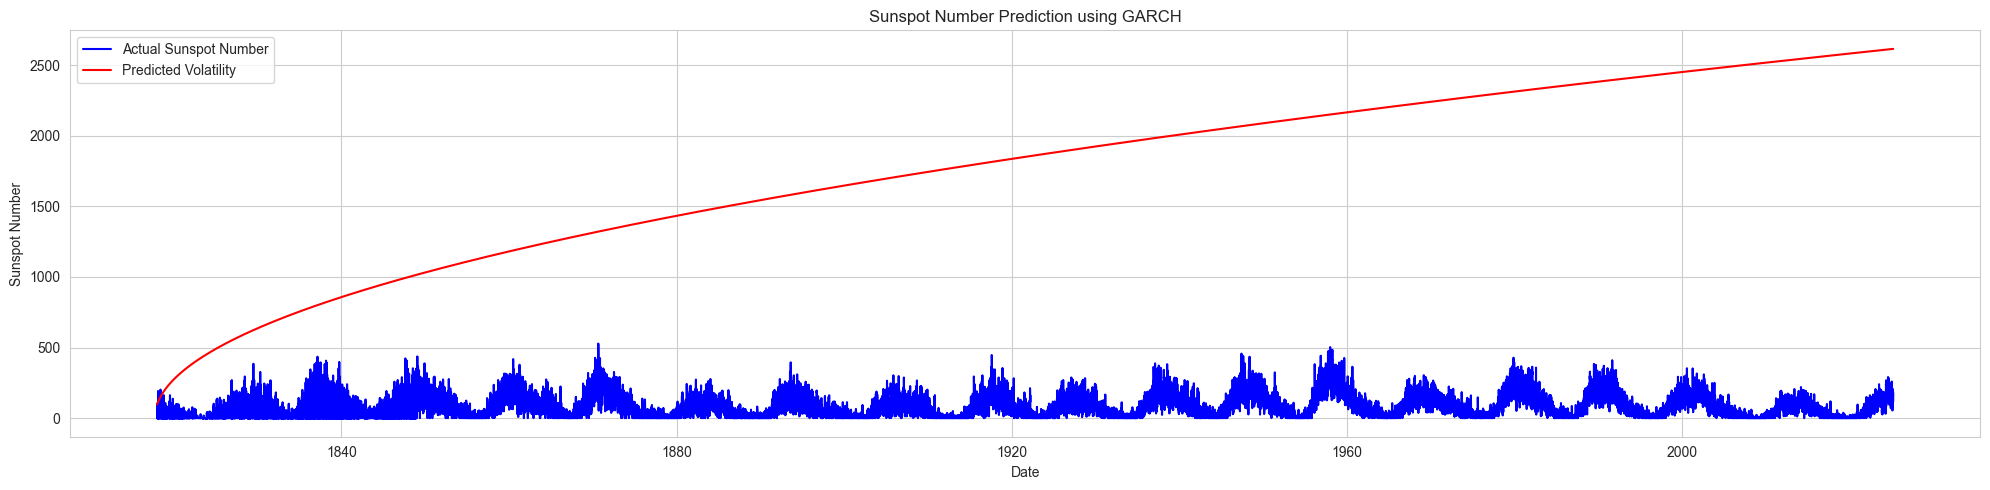

In [41]:
# Make predictions
predictions_garch = model_garch_fit.forecast(horizon=len(time_series_data))

# Extract the forecasted volatility
forecasted_volatility = np.sqrt(predictions_garch.variance.values[-1, :])

# Plot the actual and predicted values
plt.figure(figsize=(20, 5))

# Plot actual values
plt.plot(df['Date'], time_series_data, label='Actual Sunspot Number', color='blue')

# Plot predicted values
plt.plot(df['Date'], forecasted_volatility, label='Predicted Volatility', color='red')

# Set plot title and labels
plt.title('Sunspot Number Prediction using GARCH')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.legend()
plt.tight_layout()
plt.show()

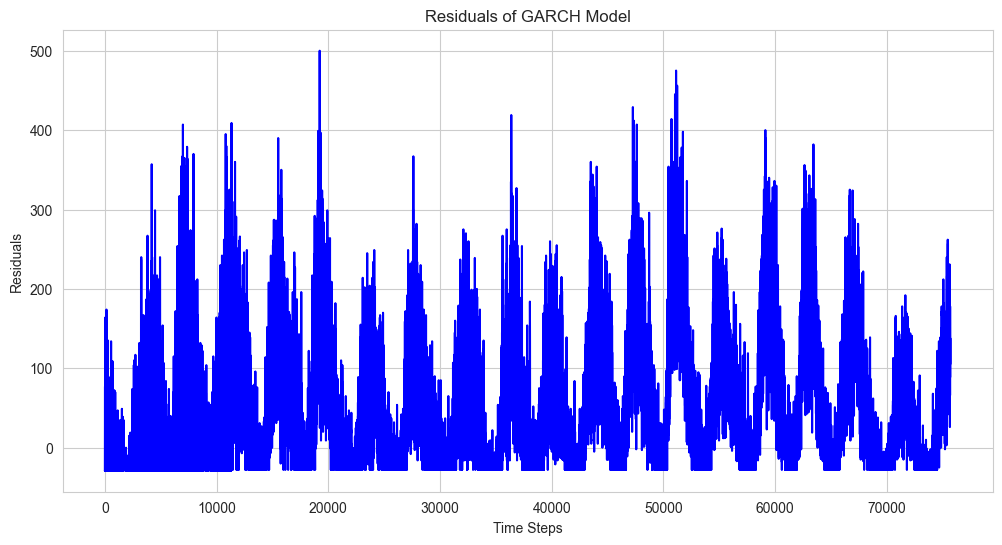

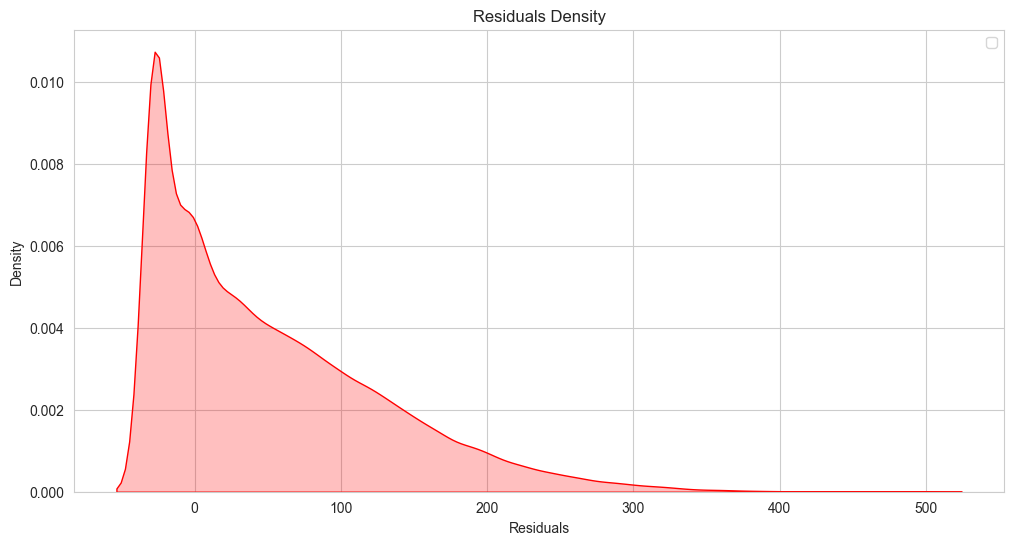

In [42]:
# Calculate the residuals of GARCH model
residuals_garch = model_garch_fit.resid

# Plotting the residuals of GARCH model
plt.figure(figsize=(12, 6))
plt.plot(residuals_garch, color='blue')
plt.title('Residuals of GARCH Model')
plt.xlabel('Time Steps')
plt.ylabel('Residuals')
plt.show()

# Plotting the residuals density
plt.figure(figsize=(12, 6))
sns.kdeplot(residuals_garch, color='red', shade=True)
plt.title('Residuals Density')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.show()

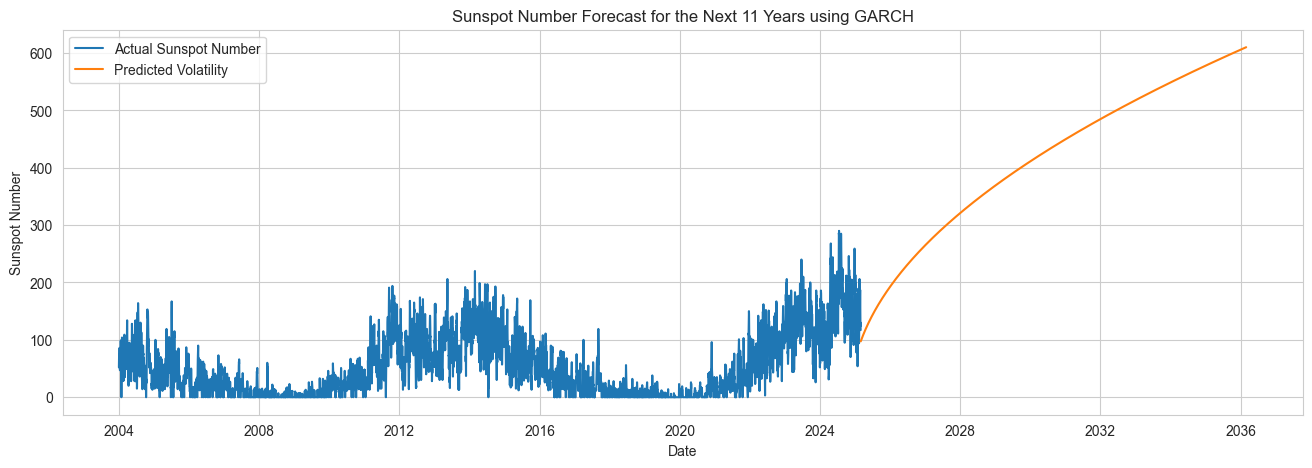

In [59]:
# Forecasting future values using GARCH with forecast for the next 11 years
forecast_period_garch = 4017  # 11 years (assuming daily data)

# Use forecast to obtain predicted_mean and confidence intervals
forecast_garch = model_garch_fit.forecast(horizon=forecast_period_garch)

# Extract the forecasted volatility
forecasted_volatility_garch = np.sqrt(forecast_garch.variance.values[-1, :])

# Create a date range for the future predictions starting one day after the last date
last_date = df['Date'].iloc[-1]
future_dates_garch = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_period_garch)

# Create a DataFrame for the future predictions
future_df_garch = pd.DataFrame({'Predicted Volatility': forecasted_volatility_garch}, index=future_dates_garch)

# Plot the actual data and the GARCH forecast
plt.figure(figsize=(16, 5))
sns.lineplot(data=filtered_df, x='Date', y='Number of Sunspots', label='Actual Sunspot Number')
sns.lineplot(x=future_df_garch.index, y=future_df_garch['Predicted Volatility'], label='Predicted Volatility')
plt.title('Sunspot Number Forecast for the Next 11 Years using GARCH')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()

In [45]:
# Calculate Mean Absolute Error (MAE) for GARCH
mae_garch = mean_absolute_error(time_series_data, forecasted_volatility)

# Calculate Mean Squared Error (MSE) for GARCH
mse_garch = mean_squared_error(time_series_data, forecasted_volatility)

# Calculate Root Mean Squared Error (RMSE) for GARCH
rmse_garch = np.sqrt(mse_garch)

# Calculate R-Squared for GARCH
r2_garch = r2_score(time_series_data, forecasted_volatility)

# Calculate Mean Absolute Scaled Error (MASE) for GARCH
mase_garch = mean_absolute_scaled_error(time_series_data, forecasted_volatility, time_series_data[:train_size])

# Calculate Explained Variance Score for GARCH
evs_garch = explained_variance_score(time_series_data, forecasted_volatility)

# Print the evaluation metrics for GARCH
print('Evaluation Metrics for GARCH Model')
print('---------------------------------------------------')
print(f'Mean Absolute Error (MAE) for GARCH: {mae_garch}')
print(f'Mean Squared Error (MSE) for GARCH: {mse_garch}')
print(f'Root Mean Squared Error (RMSE) for GARCH: {rmse_garch}')
print(f'R-Squared for GARCH: {r2_garch}')
print(f'Mean Absolute Scaled Error (MASE) for GARCH: {mase_garch}')
print(f'Explained Variance Score for GARCH: {evs_garch}')

Evaluation Metrics for GARCH Model
---------------------------------------------------
Mean Absolute Error (MAE) for GARCH: 1666.8778766528526
Mean Squared Error (MSE) for GARCH: 3147466.7802479886
Root Mean Squared Error (RMSE) for GARCH: 1774.1101375754517
R-Squared for GARCH: -526.931729680971
Mean Absolute Scaled Error (MASE) for GARCH: 86.36037685894603
Explained Variance Score for GARCH: -60.893484516171995


In [46]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Prepare the data for Holt-Winters
# Use the 'Number of Sunspots' column as the time series data
time_series_data_hw = filtered_df['Number of Sunspots']

# Split the data into train and test sets
train_size_hw = int(len(time_series_data_hw) * 0.8)
train_data_hw = time_series_data_hw[:train_size_hw]
test_data_hw = time_series_data_hw[train_size_hw:]

# Fit the Holt-Winters model
hw_model = ExponentialSmoothing(train_data_hw, seasonal='add', seasonal_periods=12).fit()

# Model Summary
hw_model.summary()

Dep. Variable:,Number of Sunspots,No. Observations:,6184
Model:,ExponentialSmoothing,SSE,796796.847
Optimized:,True,AIC,30073.795
Trend:,None,BIC,30168.011
Seasonal:,Additive,AICC,30073.884
Seasonal Periods:,12,Date:,"Sat, 05 Apr 2025"
Box-Cox:,False,Time:,01:55:35
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9722478,alpha,True
smoothing_seasonal,0.0269564,gamma,True


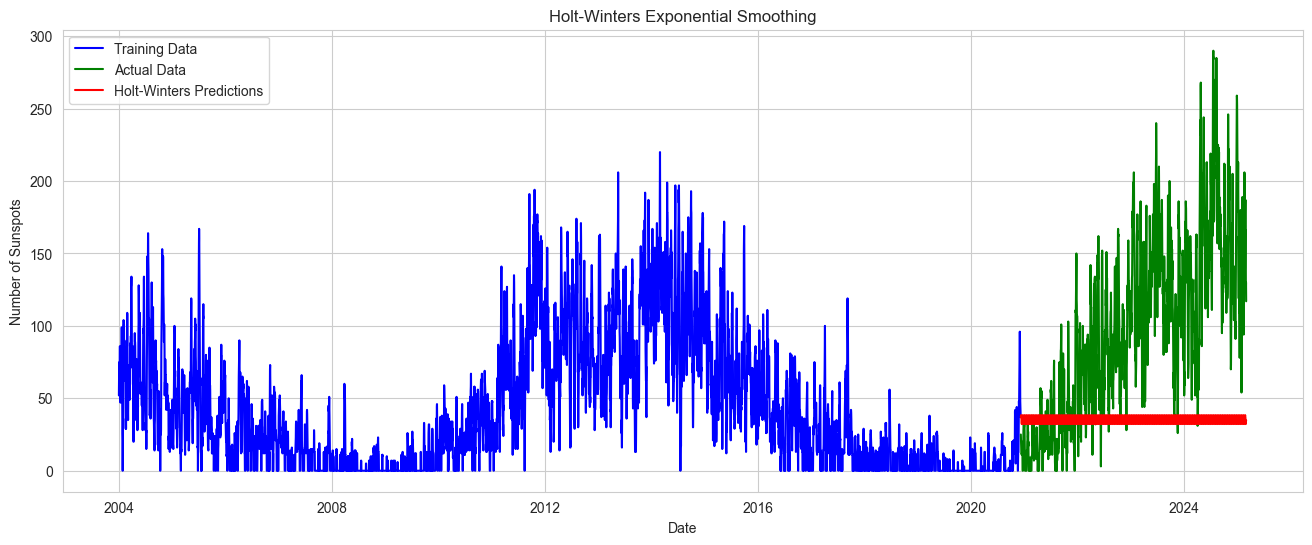

In [51]:
# Make predictions
hw_predictions = hw_model.forecast(len(test_data_hw))

# Plot the actual and predicted values
plt.figure(figsize=(16, 6))
plt.plot(filtered_df['Date'][:train_size_hw], train_data_hw, label='Training Data', color='blue')
plt.plot(filtered_df['Date'][train_size_hw:], test_data_hw, label='Actual Data', color='green')
plt.plot(filtered_df['Date'][train_size_hw:], hw_predictions, label='Holt-Winters Predictions', color='red')
plt.title('Holt-Winters Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Number of Sunspots')
plt.legend()
plt.show()

In [52]:
# Calculate Mean Absolute Error (MAE) for Holt-Winters
mae_hw = mean_absolute_error(test_data_hw, hw_predictions)

# Calculate Mean Squared Error (MSE) for Holt-Winters
mse_hw = mean_squared_error(test_data_hw, hw_predictions)

# Calculate Root Mean Squared Error (RMSE) for Holt-Winters
rmse_hw = np.sqrt(mse_hw)

# Calculate R-Squared for Holt-Winters
r2_hw = r2_score(test_data_hw, hw_predictions)

# Calculate Explained Variance Score for Holt-Winters
evs_hw = explained_variance_score(test_data_hw, hw_predictions)

# Print the evaluation metrics for Holt-Winters
print('Evaluation Metrics for Holt-Winters Model')
print('---------------------------------------------------')
print(f'Mean Absolute Error (MAE) for Holt-Winters: {mae_hw}')
print(f'Mean Squared Error (MSE) for Holt-Winters: {mse_hw}')
print(f'Root Mean Squared Error (RMSE) for Holt-Winters: {rmse_hw}')
print(f'R-Squared for Holt-Winters: {r2_hw}')
print(f'Explained Variance Score for Holt-Winters: {evs_hw}')

Evaluation Metrics for Holt-Winters Model
---------------------------------------------------
Mean Absolute Error (MAE) for Holt-Winters: 70.69927756145194
Mean Squared Error (MSE) for Holt-Winters: 7798.1983670792815
Root Mean Squared Error (RMSE) for Holt-Winters: 88.30740833632976
R-Squared for Holt-Winters: -1.036169391479394
Explained Variance Score for Holt-Winters: -0.0006705275326364113
